##### Load Package

In [12]:
import anthropic
import json
import os 
from dotenv import load_dotenv
import base64
import httpx
from IPython.display import Image

In [13]:
load_dotenv()
ANTHROPIC_API_KEY = os.environ.get("ANTHROPIC_API_KEY")

In [47]:
file_path_image = "/Users/zhichen/Desktop/Regulation/Data/Hierarchical_Inconsistent_Table.png"

with open(file_path_image, "rb") as image_file:
    binary_data = image_file.read()
    base_64_encoded_data = base64.b64encode(binary_data)
    base64_string = base_64_encoded_data.decode('utf-8')

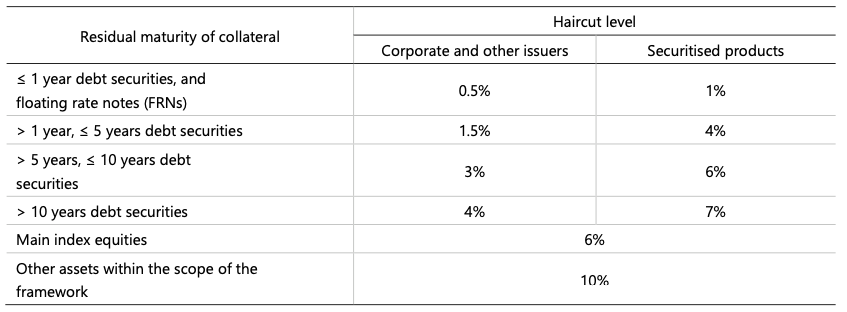

In [48]:
Image(filename=file_path_image) 

In [21]:
client = anthropic.Anthropic()

In [36]:
prompt_identify_merged_cell = """Please analyze the table in the image and convert it to markdown format. Follow these steps carefully:

1. Identify merged cells:
   - Look for cells that span multiple rows or columns.
   - A merged cell typically has borders that extend beyond a single row or column.
   - It may contain text that appears centered across multiple rows or columns.

2. Unmerge cells using these rules:
   - For cells merged across rows: Repeat the content in each row it spans.
   - For cells merged across columns: Repeat the content in each column it spans
   - For cells merged across both rows and columns: Combine both approaches.

3. Convert to markdown

"""

In [10]:
prompt_identify_inconsistent_info = """Analyze the table in the image and identify any inconsistencies in the content, particularly focusing on columns that should contain uniform data types or categories. Follow these steps:
1. Initial table analysis:
   - Identify all columns and their headers.
   - Determine the expected data type or category for each column based on its header.

2. Content consistency check:
   - For each column:
     a. Examine every cell's content.
     b. Determine if the content matches the expected data type or category for that column.
     c. Flag any cells that don't match the expected pattern.

3. Identify patterns of inconsistency:
   - Look for rows where multiple cells don't match expected patterns.
   - Pay special attention to:
     * Rows near the bottom of the table (often contain summaries or averages).
     * Rows with visually distinct formatting.
     * Sudden changes in data type (e.g., text in a numeric column).

4. Categorize inconsistencies:
   - Determine if inconsistent rows are:
     a. Summary statistics (e.g., totals, averages, percentages).
     b. Category labels or subheaders.
     c. Miscellaneous notes or annotations.
     d. Errors or misplaced data.

5. Decision on table splitting:
   - Decide whether to split the table based on these criteria:
     a. If there's a clear division between consistent and inconsistent rows.
     b. If inconsistent rows serve a different purpose (e.g., summary vs. raw data).
     c. If separating the data would improve clarity and usability.

6. Split the table:
   - If splitting is necessary:
     a. Create a main table with all consistent rows.
     b. Create one or more additional tables for inconsistent rows, grouped by their purpose or type.

7. Convert to markdown:
   - Convert each resulting table to markdown format.
   - Use appropriate headers for each table to clarify its content.

"""

In [32]:
prompt_combine_inconsistent_merged_cell = """Analyze the table in the image and convert it to markdown format, addressing inconsistent content and merged cells. Follow these steps carefully:

1. Initial Analysis:
   a. Identify all columns and their headers.
   b. Note any visually distinct sections or formatting.

2. Inconsistent Content Identification:
   a. For each column:
      - Determine the expected data type or category based on the column name.
      - Examine every cell's content for consistency with this expectation.
   b. Flag any rows where the content doesn't match the expected pattern for one or more columns.
   c. Categorize inconsistent rows (e.g., summary statistics, notes, subheaders).

3. Merged Cell Identification:
   a. Look for cells that span multiple rows or columns. Indicators include:
      - Cells larger than others, extending across multiple row or column boundaries.
      - Absence of internal borders where expected.
      - Text centered across what would normally be multiple cells.
      - Continuous borders spanning multiple row or column widths.
   b. For each merged cell, note its location and how many rows/columns it spans.

4. Table Splitting:
   a. Create a main table with all consistent rows.
   b. Create separate tables for groups of inconsistent rows based on their purpose or type.

5. Unmerging Cells:
   Apply these rules to unmerge cells:
   a. For cells merged across rows: Repeat the content in each row it spans.
   b. For cells merged across columns: Repeat the content in each column it spans.
   c. For cells merged across both rows and columns: Repeat the content in each cell it spans.

6. Markdown Conversion:
   a. Convert the main table to markdown:
      - Use | to separate columns.
      - Use a row of dashes (---) to separate the header from the body.
      - Ensure each row has the same number of | symbols.
   b. Convert each additional table for inconsistent rows to markdown similarly.
   c. Provide appropriate headers or labels for each table.

"""

In [44]:
prompt_combine_hierarchical =  """Analyze the table in the image and convert it to markdown format, paying special attention to the hierarchical column structure. Follow these steps:

1. Identify the Hierarchical Column Structure:
   a. Determine the number of levels in the column hierarchy.
   b. Note how top-level columns relate to sub-columns.

2. Prepare the Markdown Header:
   a. Create a header row for each level of the hierarchy.
   b. Combine the column names from different levels, separated by a delimiter (e.g., " - ").
   c. Ensure each final column has a unique, combined name.

3. Create the Markdown Table Structure:
   a. Start with the combined header row.
   b. Add a separator row with dashes (---) for each column.
   c. Add the data rows.

4. Handling Merged Cells in Headers:
   a. For top-level headers spanning multiple sub-columns, repeat the top-level name for each sub-column.
   b. Ensure alignment of sub-columns under their respective top-level headers.

5. Formatting Rules:
   a. Use | to separate columns.
   b. Align the content in each column (left, center, or right) based on the data type.
   c. Ensure each row has the same number of | symbols.

6. Convert the Content:
   a. Transfer the data from the original table to the markdown format.
   b. Maintain the relationship between data and its corresponding hierarchical header.


"""

In [60]:
prompt_combine_hierarchical_merge =  """Analyze the table in the image and convert it to markdown format, 

Paying special attention to the hierarchical column structure. Follow these steps:

1. Identify the Hierarchical Column Structure:
   a. Determine the number of levels in the column hierarchy.
   b. Note how top-level columns relate to sub-columns.

2. Prepare the Markdown Header:
   a. Create a header row for each level of the hierarchy.
   b. Combine the column names from different levels, separated by a delimiter (e.g., " - ").
   c. Ensure each final column has a unique, combined name.

3. Create the Markdown Table Structure:
   a. Start with the combined header row.
   b. Add a separator row with dashes (---) for each column.
   c. Add the data rows.

4. Handling Merged Cells in Headers:
   a. For top-level headers spanning multiple sub-columns, repeat the top-level name for each sub-column.
   b. Ensure alignment of sub-columns under their respective top-level headers.

5. Merged Cell Identification:
   a. Look for cells that span multiple rows or columns. Indicators include:
      - Cells larger than others, extending across multiple row or column boundaries.
      - Absence of internal borders where expected.
      - Text centered across what would normally be multiple cells.
      - Continuous borders spanning multiple row or column widths.
   b. For each merged cell, note its location and how many rows/columns it spans.

6. Unmerging Cells:
   Apply these rules to unmerge cells:
   a. For cells merged across rows: Repeat the content in each row it spans.
   b. For cells merged across columns: Repeat the content in each column it spans.
   c. For cells merged across both rows and columns: Repeat the content in each cell it spans.

7. Formatting Rules:
   a. Use | to separate columns.
   b. Align the content in each column (left, center, or right) based on the data type.
   c. Ensure each row has the same number of | symbols.

8. Convert the Content:
   a. Transfer the data from the original table to the markdown format.
   b. Maintain the relationship between data and its corresponding hierarchical header.
"""

In [61]:
response = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=1024,
    messages = [
    {
        "role": 'user',
        "content": [
            {"type": "image", 
             "source": {"type": "base64", 
                        "media_type": "image/png", 
                        "data": base64_string}},
            {"type": "text", 
             "text": prompt_combine_hierarchical_merge}
        ]
    }
]
)

reponse_string = response.content[0].text

print(reponse_string)

After analyzing the image, I'll convert the table to markdown format following the steps you've outlined:

1. The table has a two-level hierarchical column structure.
2. Here's the markdown table with the hierarchical headers:

| Residual maturity of collateral | Haircut level - Corporate and other issuers | Haircut level - Securitised products |
|----------------------------------|-------------------------------------------|-------------------------------------|
| ≤ 1 year debt securities, and floating rate notes (FRNs) | 0.5% | 1% |
| > 1 year, ≤ 5 years debt securities | 1.5% | 4% |
| > 5 years, ≤ 10 years debt securities | 3% | 6% |
| > 10 years debt securities | 4% | 7% |
| Main index equities | 6% | |
| Other assets within the scope of the framework | 10% | |

Notes on the conversion process:
- The top-level "Haircut level" header spans two sub-columns, so it's repeated for each.
- The "Residual maturity of collateral" column spans the full height of the table, so it's treated as

In [57]:
prompt_identify_table_overall = """Analyze the table in the image and provide a detailed assessment of its structure and content. Follow these steps carefully:

1. Column Identification:
   a. Examine the top portion of the table for potential column names.
   b. Determine if column names are present by checking if:
      - The top row(s) contain text that describes the content below.
      - The content in these cells is visually distinct (e.g., different table line structure, bold font, different background).
   c. If column names are present:
      - Determine if there's a hierarchical structure by checking if:
        * There are multiple rows of headers stacked on top of each other.
        * Some headers span multiple columns in the row below.
   d. If no distinct column names are found, state "No column names identified."
   

2. Table Classification:
   a. Hierarchical Table Assessment:
      - Look for multi-level column names.
      - If present, classify as "Hierarchical Table: Yes" and describe the hierarchy.
      - Otherwise, classify as "Hierarchical Table: No".
   
   b. Merged Cells Detection:
      -Carefully examine the table for merged cells. A merged cell is a single cell that spans multiple rows or columns, effectively taking the space of two or more regular cells. Look for the following indicators:
      (1). Visual cues:
           A cell that appears larger than others, extending across multiple row or column boundaries.
           Absence of internal borders where you would expect to see them if cells were not merged.

      (2). Content alignment:
           Text or data centered across what would normally be multiple cells.

      (3). Border patterns:
           Continuous borders that span multiple row or column widths without breaks.
           Missing vertical or horizontal lines where cell borders should be.

      (4). Asymmetry in the table structure:
           Regions where the usual grid pattern of the table is disrupted.
           Areas where the number of visible cells doesn't match the overall column or row count.

      (5). Header structures:
           Column headers that span multiple columns.
           Row labels that extend across several rows.

      (6). Data presentation:
           Single entries that appear to correspond to multiple rows or columns of data.

   c. Vanilla Table Assessment:
      - Check if the table is classified as hierarchical table.
      - Check if the table contains merged celss.
      - If all conditions are not, classify as "Vanilla Table: Yes".
      - Otherwise, classify as "Vanilla Table: No".


4. Content Consistency Analysis:
   a. For each column:
      - Determine the expected data type or category based on the column name.
      - Check each cell in the column for consistency with this expectation.
   b. Identify any inconsistencies:
      - check that rows with different data types than the majority in that column.
      - check that Sudden changes in content style or format.
      - check that Summary statistics or aggregations mixed with raw data.
   c. If inconsistencies are found:
      - Classify as "Contains Inconsistent Values: Yes".
      - Describe the nature and location of inconsistencies.
      - Suggest how the table could be split or reorganized for clarity.
   d. If no inconsistencies, classify as "Contains Inconsistent Values: No".

5. Summary and Recommendations:
   a. Provide a concise summary of the table's structure and content.
   b. Highlight any unique or challenging aspects of the table.
   c. If applicable, suggest how the table could be simplified or clarified.

Example Summary:

Now, please analyze the table in the provided image following these steps. Provide a detailed assessment of its structure and content, clearly stating your findings for each point.
"""

In [58]:
response = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=1024,
    messages = [
    {
        "role": 'user',
        "content": [
            {"type": "image", 
             "source": {"type": "base64", 
                        "media_type": "image/png", 
                        "data": base64_string}},
            {"type": "text", 
             "text": prompt_identify_table_overall}
        ]
    }
]
)

reponse_string = response.content[0].text

print(reponse_string)

Here's a detailed analysis of the table structure and content based on the provided steps:

1. Column Identification:
   a. The table has clear column names in the top portion.
   b. Column names are present and visually distinct, appearing in a separate row.
   c. There is a hierarchical structure in the column names:
      - The top row contains "Haircut level" spanning two columns below it.
      - Below "Haircut level" are two sub-columns: "Corporate and other issuers" and "Securitised products".

2. Table Classification:
   a. Hierarchical Table Assessment: Hierarchical Table: Yes
      The table has a two-level hierarchy in the column structure.
   
   b. Merged Cells Detection: Yes, merged cells are present
      - The "Haircut level" cell spans two columns.
      - The "Residual maturity of collateral" column has cells that span across the entire row.
   
   c. Vanilla Table Assessment: Vanilla Table: No
      The table is not a vanilla table due to its hierarchical structure a